# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 2*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 2
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to implement some functionalities on the dataset that you worked with in the first assignment.

### DEADLINE FOR THIS ASSIGNMENT IS 01 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## Preparing data

### 1. Read 2020 and 2021 data for your selected country. You only need provincial data for this assignment. Print the first 5 lines of data

In [2]:
# Import data for 2020
file_path = './Region_Mobility_Report_CSVs/2020_GR_Region_Mobility_Report.csv'
df_2020 = pd.read_csv(file_path)

# Import data for 2021
url = "http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2021/GR"
df_2021 = pd.read_csv(url)

#Combined dataframes
df = df_2020.append(df_2021)


### 2. For this assignment, select and extract the data for a single province. Name the dataframe for this subset `df_province_selected`

In [3]:
#Extract data for the province of Crete
df_province_selected = (df.loc[df.sub_region_1=='Decentralized Administration of Crete', :])

df_province_selected.head()


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
642,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/15/2020,-8.0,-1.0,-31.0,3.0,1,3
643,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/16/2020,-6.0,-3.0,-21.0,11.0,-2,3
644,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/17/2020,6.0,3.0,3.0,16.0,4,-1
645,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/18/2020,5.0,4.0,13.0,8.0,3,-1
646,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/19/2020,7.0,5.0,23.0,9.0,4,-1


The following show an example from extracting the data for South Holland, the Netherlands

In [4]:
df_province_selected.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
642,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/15/2020,-8.0,-1.0,-31.0,3.0,1,3
643,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/16/2020,-6.0,-3.0,-21.0,11.0,-2,3
644,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/17/2020,6.0,3.0,3.0,16.0,4,-1
645,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/18/2020,5.0,4.0,13.0,8.0,3,-1
646,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/19/2020,7.0,5.0,23.0,9.0,4,-1


### 3. Aggregated measurements

#### Write a function with the following arguments as the input:
- a dataset as a dataframe object
- list of attributes (refers to df.columns)
- a year
- one of the following statistic measurements: mean/median/max/min. You can use [enum](https://docs.python.org/3/library/enum.html) for this argument.
  
The function will then return the required statistic on some attributes of the data for a particular year.

In [5]:
#Create a new column only with the year 

#Convert date to Datetime format 
date2 = pd.to_datetime(df_province_selected['date'])
df_province_selected.insert(loc=9, column ='date2', value=date2)

#Extract the year from the Datetime yy-mm-dd
years= df_province_selected['date2'].dt.year

#Add the years as a new column in df_province_Crete
df_province_selected.insert(loc=10, column ='years', value=years)

df_province_selected.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,date2,years,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
642,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/15/2020,2020-02-15,2020,-8.0,-1.0,-31.0,3.0,1,3
643,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/16/2020,2020-02-16,2020,-6.0,-3.0,-21.0,11.0,-2,3
644,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/17/2020,2020-02-17,2020,6.0,3.0,3.0,16.0,4,-1
645,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/18/2020,2020-02-18,2020,5.0,4.0,13.0,8.0,3,-1
646,GR,Greece,Decentralized Administration of Crete,NaN,NaN,NaN,NaN,ChIJg7ePxdcDmxQRmJlhKBGUMrs,2/19/2020,2020-02-19,2020,7.0,5.0,23.0,9.0,4,-1


In [6]:
# Μοdify the following line to make the function calculate the 'mean' when the statistic argument is empty.

def calculate_statistic(data, attributes, year, statistic):     
    if year == 2020:
        if statistic == 'mean':
            result = data[attributes].mean()
        elif statistic == 'median':
            result = data[attributes].median()
        elif statistic == 'max':
            result = data[attributes].max()  
        elif statistic == 'min':
            result = data[attributes].min()
    elif year == 2021:    
        if statistic == 'mean':
            result = data[attributes].mean()
        elif statistic == 'median':
            result = data[attributes].median()
        elif statistic == 'max':
            result = data[attributes].max()  
        elif statistic == 'min':
            result = data[attributes].min()   
    else:
        if (year != 2020) or (year != 2021):
            print('The year should be 2020 or 2021. Try again')
        elif (statistic != 'mean') or (statistic != 'median') or (statistic != 'max') or (statistic != 'min'):
            print('Wrong input for statistic')
    
    print('The %s value of %s in %d is equal to %.3f.' % (statistic, attributes, year, result))           
                
                
                

#### Call your calculate_statistic function and print the results with three different input arguments

In [7]:
# First call of calculate_statistic function
calculate_statistic(df_province_selected,'workplaces_percent_change_from_baseline', 2021, 'max')
calculate_statistic(df_province_selected,'parks_percent_change_from_baseline', 2020, 'mean')



The max value of workplaces_percent_change_from_baseline in 2021 is equal to 46.000.
The mean value of parks_percent_change_from_baseline in 2020 is equal to 84.133.


In [24]:
#Call of calculate_statistic function with wong input year 
calculate_statistic(df_province_selected,'transit_stations_percent_change_from_baseline', 2005, 'median')

The year should be 2020 or 2021. Try again


UnboundLocalError: local variable 'result' referenced before assignment

## Activity changes

Since there are quite some noises when looking at daily data, it is easier to observe data on a larger aggregation level. The following code derives 7-day averages for the provice data. We also prepare a plot to visualise it for you.

In [9]:
#Check if the index is unique 
df_province_selected.index.is_unique

#Drop the duplicates from the dataframe 
df_province_selected = df_province_selected[~df_province_selected.index.duplicated(keep='first')]

In [10]:
df_province_agg = df_province_selected.resample('7D', on='date2').mean()
df_province_agg.reset_index(inplace=True)
df_province_agg.head()

,date2,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,years,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,NaN,NaN,NaN,NaN,2020.0,2.000000,0.571429,0.285714,8.857143,2.571429,0.142857
1,2020-02-22,NaN,NaN,NaN,NaN,2020.0,3.428571,5.714286,8.000000,10.142857,4.142857,-0.142857
2,2020-02-29,NaN,NaN,NaN,NaN,2020.0,7.714286,4.142857,32.571429,18.000000,-4.714286,-0.428571
3,2020-03-07,NaN,NaN,NaN,NaN,2020.0,-5.428571,12.285714,5.285714,-1.857143,-3.857143,3.428571
4,2020-03-14,NaN,NaN,NaN,NaN,2020.0,-59.285714,-11.000000,-26.000000,-41.285714,-39.000000,16.285714


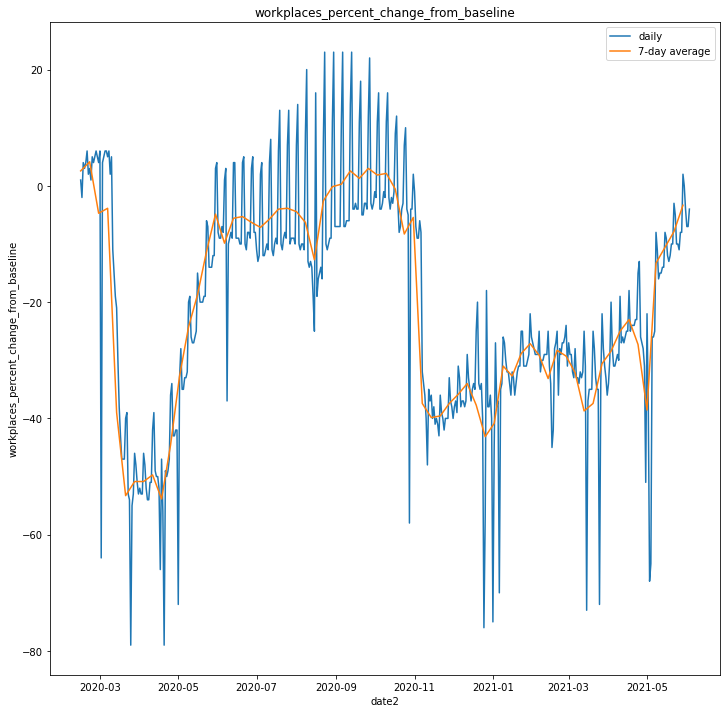

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(x='date2', y='workplaces_percent_change_from_baseline', data=df_province_selected, label='daily', ax=ax)
sns.lineplot(data=df_province_agg, x='date2', y='workplaces_percent_change_from_baseline', label='7-day average', ax=ax)
plt.show()

## Identifying peaks

Let's focus on the 7-day averaged data. This averaged time series data shows how many times workplace changes reach peaks. Your task is to identify these moments. 

### 4. Identify peaks with personal code

Complete the function below. Your function should return (at least) a list of indexes where there are peaks in data.

**Peak** is a point in the graph whose y -value is biger than the y -values of both of its immediate neighbors

In [12]:
def my_find_peaks(data, activity, **kwargs):

    array = list(data[activity])
    peaks = []

    for i in range(0,len(array)-1):
        #Check if the first value is the peak
        if i==0:
            if(array[0] > array[1]): 
                peaks.append(0)
        #Check if the last value is the peak
        elif i==len(array)-1:
            if(array[len(array)-1]>array[len(array)-2]):
                peaks.append(i)
        #Check for the rest values        
        else:
            if array[i-1] < array[i] > array[i+1]:
                peaks.append(i)
                

    return peaks
    
    

In [13]:
activity = 'grocery_and_pharmacy_percent_change_from_baseline'
max_ind = my_find_peaks(
    df_province_agg, 
    activity
)
max_ind

[1, 3, 8, 13, 15, 25, 30, 37, 44, 47, 49, 54, 62]

In [14]:
# Assign the data related to the max_ind to df_max
df_max = df_province_agg.iloc[max_ind]

df_max

,date2,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,years,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1,2020-02-22,NaN,NaN,NaN,NaN,2020.0,3.428571,5.714286,8.000000,10.142857,4.142857,-0.142857
3,2020-03-07,NaN,NaN,NaN,NaN,2020.0,-5.428571,12.285714,5.285714,-1.857143,-3.857143,3.428571
8,2020-04-11,NaN,NaN,NaN,NaN,2020.0,-67.428571,2.428571,-32.000000,-68.142857,-49.714286,19.857143
13,2020-05-16,NaN,NaN,NaN,NaN,2020.0,-33.142857,16.571429,79.285714,-38.571429,-18.714286,5.571429
15,2020-05-30,NaN,NaN,NaN,NaN,2020.0,-14.000000,15.428571,57.428571,-25.714286,-4.857143,3.428571
25,2020-08-08,NaN,NaN,NaN,NaN,2020.0,60.857143,58.142857,310.000000,156.571429,-6.285714,-2.857143
30,2020-09-12,NaN,NaN,NaN,NaN,2020.0,22.142857,28.571429,137.000000,111.714286,2.571429,-3.142857
37,2020-10-31,NaN,NaN,NaN,NaN,2020.0,-1.428571,18.571429,30.857143,9.857143,-5.428571,-0.857143
44,2020-12-19,NaN,NaN,NaN,NaN,2020.0,-46.714286,18.000000,7.571429,-49.428571,-37.714286,8.571429
47,2021-01-09,NaN,NaN,NaN,NaN,2021.0,-55.428571,-1.428571,-8.000000,-51.857143,-31.000000,8.285714


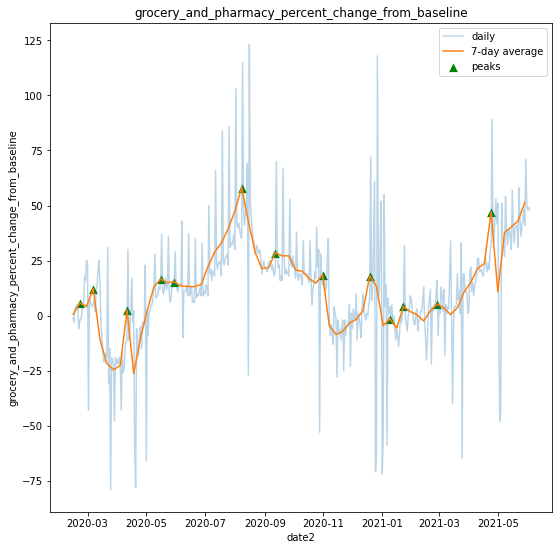

In [15]:
#Code to visualise the raw data, sampled data and the peaks
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(9,9))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date2', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.3)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date2', y=activity, label='7-day average', ax=ax, alpha=1)
# label the peaks
sns.scatterplot(x='date2', y=activity, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
plt.show()

### 5. Identify peaks using library scipy - [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

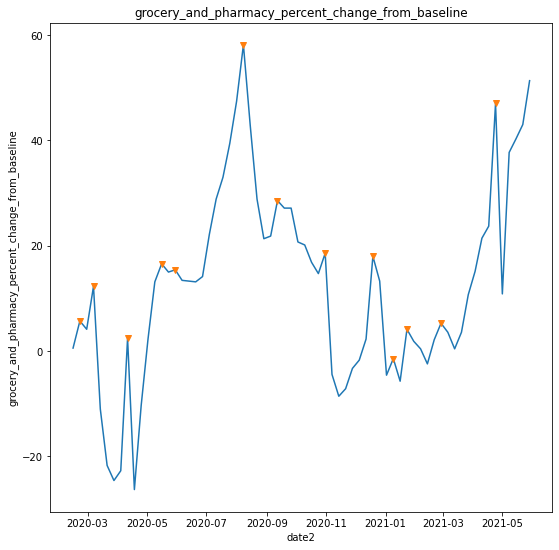

In [16]:
# Find and plot the peaks using scipy 
from scipy.signal import find_peaks

y = df_province_agg[activity].values
x = df_province_agg['date2'].values
index, _= find_peaks(y, distance=1)
fig, ax = plt.subplots(figsize=(9,9))
ax.set_title(activity)
ax.set_xlabel('date2')
ax.set_ylabel(activity)

plt.plot(x, y)
plt.plot(x[index], y[index], "v")



### 6. Identify valleys

You have identified the peaks in the data above using both your personal approach and the scipy library. Here, you can also identify the valleys (or troughs) using either of these approaches.

**Valley** is a point in the graph whose y -value is smaller than the y -values of both of its immediate neighbors

In [17]:
def my_find_valleys(data, activity, **kwargs):
    array = list(data[activity])
    valleys = []

    for i in range(0,len(array)-1):
        #Check if the first value is the valley
        if i==0:
            if(array[0] < array[1]): 
                valleys.append(0)
        #Check if the last value is the valley
        elif i==len(array)-1:
            if(array[len(array)-1]<array[len(array)-2]):
                valleys.append(i)
        #Check for the rest values
        else:
            if array[i-1] > array[i] < array[i+1]:
                valleys.append(i)
                

    return valleys

In [18]:
activity = 'grocery_and_pharmacy_percent_change_from_baseline'
act = list(df_province_agg[activity])
min_idx = my_find_valleys(df_province_agg, activity)
df_min = df_province_agg.iloc[min_idx]

df_min

,date2,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,years,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,NaN,NaN,NaN,NaN,2020.0,2.000000,0.571429,0.285714,8.857143,2.571429,0.142857
2,2020-02-29,NaN,NaN,NaN,NaN,2020.0,7.714286,4.142857,32.571429,18.000000,-4.714286,-0.428571
6,2020-03-28,NaN,NaN,NaN,NaN,2020.0,-71.142857,-24.571429,-51.142857,-74.428571,-50.857143,21.714286
9,2020-04-18,NaN,NaN,NaN,NaN,2020.0,-74.000000,-26.285714,-36.000000,-71.428571,-53.857143,20.857143
14,2020-05-23,NaN,NaN,NaN,NaN,2020.0,-22.714286,15.000000,51.857143,-32.285714,-11.285714,5.000000
18,2020-06-20,NaN,NaN,NaN,NaN,2020.0,-4.571429,13.142857,80.857143,-22.857143,-5.285714,1.142857
28,2020-08-29,NaN,NaN,NaN,NaN,2020.0,26.000000,21.333333,NaN,NaN,-0.142857,-2.000000
36,2020-10-24,NaN,NaN,NaN,NaN,2020.0,0.428571,14.714286,58.428571,35.000000,-8.285714,0.285714
39,2020-11-14,NaN,NaN,NaN,NaN,2020.0,-60.142857,-8.571429,-24.000000,-56.857143,-39.857143,13.285714
46,2021-01-02,NaN,NaN,NaN,NaN,2021.0,-56.000000,-4.571429,7.428571,-55.857143,-40.857143,10.571429


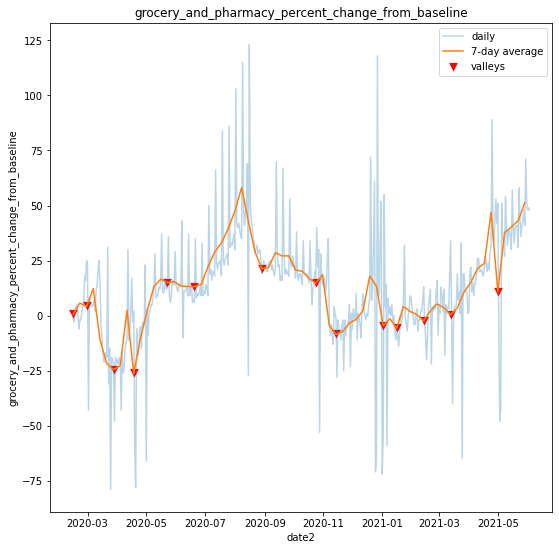

In [19]:
#Code to visualise the raw data, sampled data and the peaks
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(9,9))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date2', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.3)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date2', y=activity, label='7-day average', ax=ax, alpha=1)
# label the peaks
sns.scatterplot(x='date2', y=activity, data=df_min, label='valleys', ax=ax, marker='v', color='r', s=100)
plt.show()

### 7. Identify all the peaks (and potentially valleys) for all the activities in the data. Print out the peaks for each of the activities. 

If you are brave, you can make use of the plotting piece of code that is provided above to plot the results.

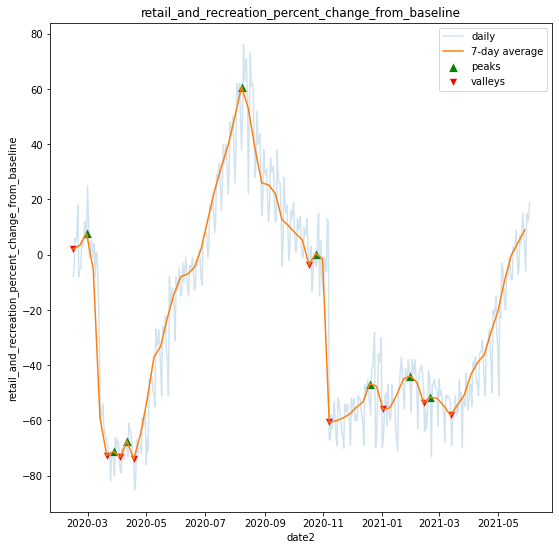

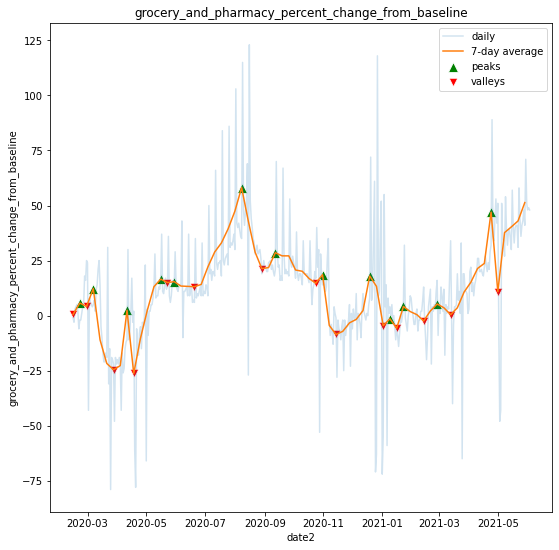

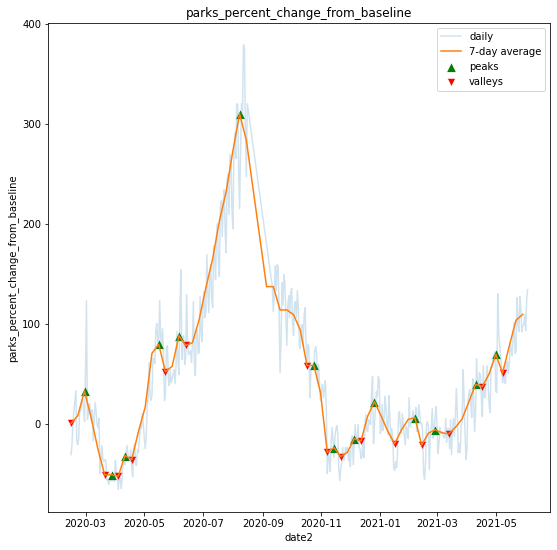

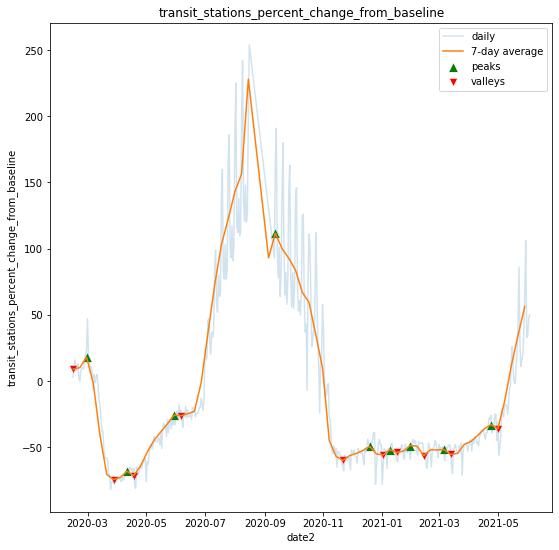

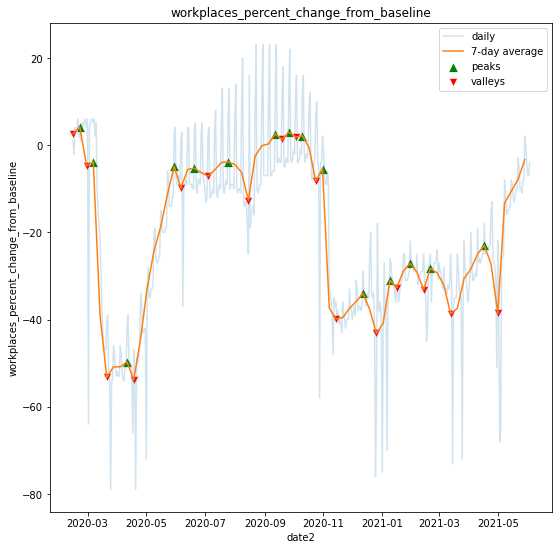

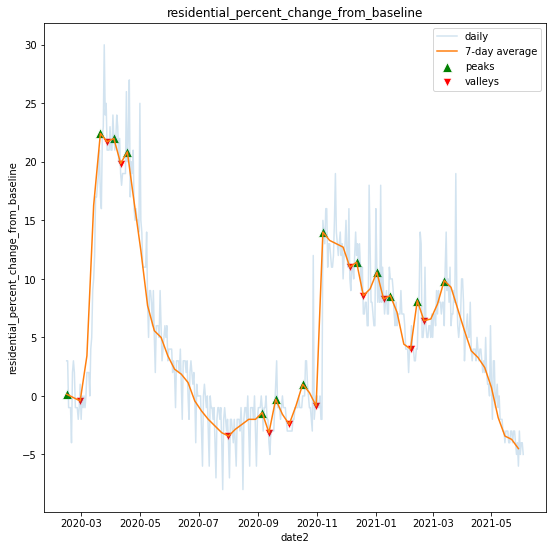

In [20]:
#Create a list for all activities
list_of_Activities = ['retail_and_recreation_percent_change_from_baseline', 
                    'grocery_and_pharmacy_percent_change_from_baseline',
                    'parks_percent_change_from_baseline',
                    'transit_stations_percent_change_from_baseline',
                    'workplaces_percent_change_from_baseline',
                    'residential_percent_change_from_baseline']

for activ in range (len(list_of_Activities)):
    max_idx = my_find_peaks(df_province_agg, list_of_Activities[activ])
    df_max = df_province_agg.iloc[max_idx]
    
    
    min_idx = my_find_valleys(df_province_agg, list_of_Activities[activ])
    df_min = df_province_agg.iloc[min_idx]
    
    # create a figure and an axis to plot
    fig, ax = plt.subplots(figsize=(9,9))
    # set the title of the plot
    ax.set_title(list_of_Activities[activ])
    # plot the daily values
    sns.lineplot(x='date2', y=list_of_Activities[activ], data=df_province_selected, label='daily', ax=ax, alpha=0.2)
    # plot the 7-day average
    sns.lineplot(data=df_province_agg, x='date2', y=list_of_Activities[activ], label='7-day average', ax=ax, alpha=1)
    # label the peaks
    sns.scatterplot(x='date2', y=list_of_Activities[activ], data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
    sns.scatterplot(x='date2', y=list_of_Activities[activ], data=df_min, label='valleys', ax=ax, marker='v', color='r', s=70)
    plt.show()
    


### 8. Is there any common dates (or periods) among these peaks (and/or valleys) of different activities

*Food for thoughts*:
- One of the most naive way to find the overlapping dates is to look for common indexes (or dates) of the peaks/valleys
- A more general solution is to have a tolerance level between the days. For example, Sep 19 and Sep 20 can be considered matched (or overlapped) if the tolerance level is at least one day.

In [21]:
list_a = my_find_peaks(df_province_agg,'retail_and_recreation_percent_change_from_baseline')
list_b = my_find_peaks(df_province_agg, 'grocery_and_pharmacy_percent_change_from_baseline')
list_c = my_find_peaks(df_province_agg, 'parks_percent_change_from_baseline')
list_d = my_find_peaks(df_province_agg, 'transit_stations_percent_change_from_baseline')
list_e = my_find_peaks(df_province_agg, 'workplaces_percent_change_from_baseline')
list_f = my_find_peaks(df_province_agg, 'residential_percent_change_from_baseline')

    
def overlaping_dates(list_1,list_2):    
    table_format = '{:<10} {:<10}'
    print(table_format.format('list_1', 'list_2'))
    print('-' * 20)
    for elem in sorted(list_1):
        if elem in list_1:
            if elem in list_2:
                print(table_format.format(elem, elem))
            else:
                print(table_format.format(elem, 'Missing'))
        else:
            print(table_format.format('Missing', elem))
 

In [22]:
test12 = overlaping_dates(list_a,list_b)
test13 = overlaping_dates(list_a,list_c)
test14 = overlaping_dates(list_a,list_d)
test15 = overlaping_dates(list_a,list_e)
test16 = overlaping_dates(list_a,list_f)

list_1     list_2    
--------------------
2          Missing   
6          Missing   
8          8         
25         25        
36         Missing   
44         44        
50         Missing   
53         Missing   
list_1     list_2    
--------------------
2          2         
6          6         
8          8         
25         25        
36         36        
44         Missing   
50         Missing   
53         Missing   
list_1     list_2    
--------------------
2          2         
6          Missing   
8          8         
25         Missing   
36         Missing   
44         44        
50         50        
53         Missing   
list_1     list_2    
--------------------
2          Missing   
6          Missing   
8          8         
25         Missing   
36         Missing   
44         Missing   
50         50        
53         53        
list_1     list_2    
--------------------
2          Missing   
6          Missing   
8          Missing   
25         Miss

## OPTIONAL

Append population/density for provinces/municipalities to the dataframe. The data for Netherlands is available [here](https://www.cbs.nl/en-gb/news/2021/30/population-growth-picks-up-again)


In [23]:
# YOUR CODE HERE
